In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import h5py

In [26]:
pred_res_path_ms = 'counting_results/counting_num_07291735.h5'
pred_res_path_unet = 'counting_results/counting_num_07291728.h5'
pred_res_path_3 = 'counting_results/counting_num_07261737.h5'
gt_path = '../../violation_data/test/gp_violations_seg.h5'
pred_res_1 = h5py.File(pred_res_path_ms, 'r')
pred_res_2 = h5py.File(pred_res_path_unet, 'r')
pred_res_3 = h5py.File(pred_res_path_3, 'r')
gp_gt = h5py.File(gt_path,'r')
print(pred_res_1.keys())
print(gp_gt.keys())

<KeysViewHDF5 ['pred_dmap_gplane']>
<KeysViewHDF5 ['count', 'density_maps', 'segment_maps']>


In [27]:
pred_gp = pred_res_1['pred_dmap_gplane']
pred_gp_2 = pred_res_2['pred_dmap_gplane']
pred_gp_3 = pred_res_3['pred_dmap_gplane']
gt = gp_gt['segment_maps']

In [28]:
pred_gp = np.array(pred_gp)
pred_gp_2 = np.array(pred_gp_2)
pred_gp_3 = np.array(pred_gp_3)
gt = np.array(gt)

In [20]:
print(pred_gp_2.shape)
print(gt.shape)

(200, 1, 768, 640, 1)
(200, 768, 640, 1)


In [29]:
pred_gp = np.squeeze(pred_gp)
pred_gp_2 = np.squeeze(pred_gp_2)
pred_gp_3 = np.squeeze(pred_gp_3)
gt = np.squeeze(gt)

In [30]:
print(pred_gp.shape)

(200, 768, 640)


In [32]:
print(pred_gp_3[10].max())
print(pred_gp_3[10].min())

1.0
0.019669926


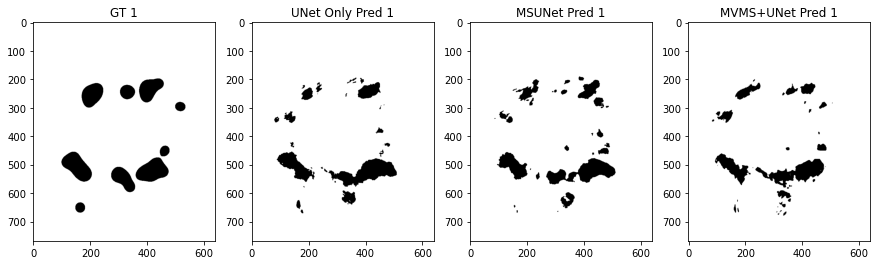

In [39]:
pred_test_2 = pred_gp_2[0]
pred_test_2[pred_test_2<0.5] =0
pred_test_2[pred_test_2>=0.5] =1

pred_test_1 = pred_gp[0]
pred_test_1[pred_test_1<0.5] =0
pred_test_1[pred_test_1>=0.5] =1

pred_test_3 = pred_gp_3[0]
pred_test_3[pred_test_3<0.5] =0
pred_test_3[pred_test_3>=0.5] =1

plt.figure(figsize=(15,15))
plt.subplot(1,4,1)
plt.title("GT 1")
plt.imshow(gt[0],cmap='gray')

plt.subplot(1,4,2)
plt.title("UNet Only Pred 1")
plt.imshow(pred_test_2,cmap='gray')

plt.subplot(1,4,3)
plt.title("MSUNet Pred 1")
plt.imshow(pred_test_1,cmap='gray')

plt.subplot(1,4,4)
plt.title("MVMS+UNet Pred 1")
plt.imshow(pred_test_3,cmap='gray')

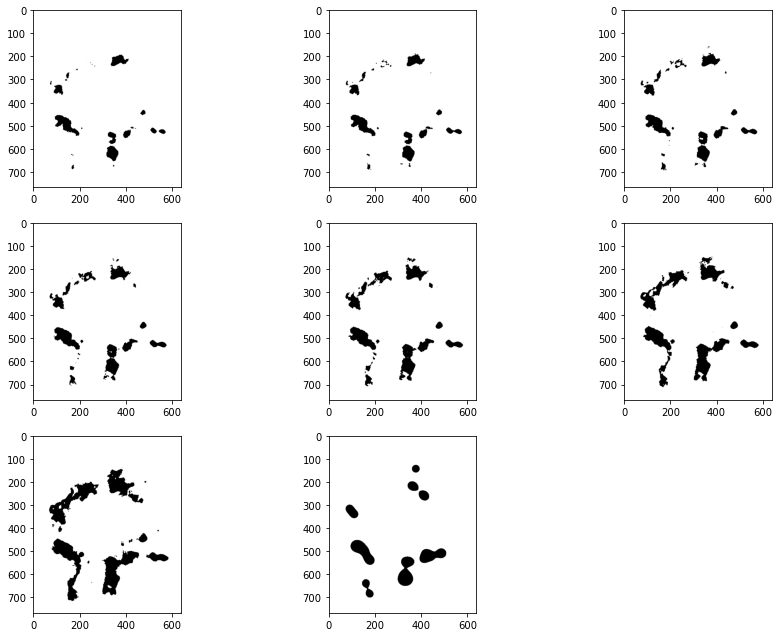

In [11]:
#print(pred_gp[10].min())
plt.figure(figsize=(15,15))
range_ = np.arange(0.3,1,0.1)
index = 1
for i in range_:
    #print(i)
    img = pred_gp[10].copy()
    #print(img.min())
    img[img<i] =0
    img[img>i] =1
    plt.subplot(4,3,index)
    plt.imshow(img,cmap='gray')
    index+=1
plt.subplot(4,3,index)
plt.imshow(gt[10],cmap='gray')